<span style="font-size:30px; color:cyan; font-weight:bold;">2. დაიმპორტება და ბაზასთან კავშირი</span>


In [11]:
import sqlite3
import matplotlib.pyplot as plt


conn = sqlite3.connect('ucl_stats.sqlite3')
cursor = conn.cursor()
print("ბაზას წარმატებით დაუკავშირდა!")

ბაზას წარმატებით დაუკავშირდა!


# 3. ბაზის წაკითხვა და დაბეჭდვა

In [13]:

print("\nშეგვყავს გოლების რაოდენობა და გამოაქვს კლუბენი რომლებმაც მითითებული ან უფრო მეტი რაოდენობის გოლი გაიტანეს")
min_goals = int(input("შეიყვანე გოლების მინიმალური რაოდენობა: "))

cursor.execute("""
    SELECT team, wins, goals_scored 
    FROM ucl_stats 
    WHERE goals_scored >= ? 
    ORDER BY goals_scored DESC
""", (min_goals,))

teams_with_goals = cursor.fetchall()  # აბრუნებს ყველა მიღებულ შედეგს ბაზიდან სიის სახით

if teams_with_goals:   # თუ შედეგები არსებობს, გამოაქვს სია
    print(f"\nკლუბები რომლებმაც გაიტანეს {min_goals} ან მეტი გოლი:")
    for team in teams_with_goals:
        print(f"{team[0]}: {team[1]} მოგება , {team[2]} გატანილი გოლი")
else:
    print(f"\nარცერთ კლუბს არ გაუტანია {min_goals} ან მეტი გოლი")


შეგვყავს გოლების რაოდენობა და გამოაქვს კლუბენი რომლებმაც მითითებული ან უფრო მეტი რაოდენობის გოლი გაიტანეს


შეიყვანე გოლების მინიმალური რაოდენობა:  40



კლუბები რომლებმაც გაიტანეს 40 ან მეტი გოლი:
ბიტიუს რეალი: 1 მოგება , 651 გატანილი გოლი
Bayern Munich: 11 მოგება , 43 გატანილი გოლი
Liverpool: 8 მოგება , 41 გატანილი გოლი


# 4. მონაცემის დამატება

In [4]:

print("\nახალი კლუბის დამატება")
year = int(input("შეიყვანე წელი: "))
team = input("შეიყვანე კლუბის სახელი: ")
match_played = int(input("რამდენი თამაში ჩაატარა: "))
wins = int(input("მოგება: "))
draws = int(input("ფრე: "))
losts = int(input("წაგება: "))
goals_scored = int(input("გატანილი გოლები: "))
goals_conceded = int(input("გაშვებული გოლები: "))
gd = goals_scored - goals_conceded  
group_point = int(input("ჯგუფურ ეტაპზე დაგროვილი ქულა: "))
champions = int(input("გახდნენ თუ არა ჩემპიონები (1-კი, 0-არა): "))

#ბაზაში ჩამატება
cursor.execute("""
    INSERT INTO ucl_stats 
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
""", (year, team, match_played, wins, draws, losts, 
      goals_scored, goals_conceded, gd, group_point, champions))
conn.commit()
print(f"{team}({year}) წარმატებით დაემატა!")


ახალი კლუბის დამატება


შეიყვანე წელი:  2040
შეიყვანე კლუბის სახელი:  ბიტიუს რეალი
რამდენი თამაში ჩაატარა:  3
მოგება:  1
ფრე:  1
წაგება:  1
გატანილი გოლები:  650
გაშვებული გოლები:  4
ჯგუფურ ეტაპზე დაგროვილი ქულა:  3
გახდნენ თუ არა ჩემპიონები (1-კი, 0-არა):  0


ბიტიუს რეალი(2040) წარმატებით დაემატა!


# 5. მონაცემის ცვლილება

In [5]:

print("\nკლუბის მონაცემების განახლება")
team_to_update = input("კლუბის სახელი: ")
year_to_update = int(input("წელი: "))

# არსებული სტატისტიკა
cursor.execute("""
    SELECT wins, draws, losts, goals_scored, goals_conceded 
    FROM ucl_stats 
    WHERE team = ? AND year = ?
""", (team_to_update, year_to_update))

current = cursor.fetchone()

if current:
    print("\nარსებული სტატისტიკა:")
    print(f"მოგება: {current[0]}\nფრე: {current[1]}\nწაგება: {current[2]}")
    print(f"გატანილი: {current[3]}\nგაშვებული: {current[4]}")
    
    # ახალი მონაცემები
    print("\nშეიყვანე ახალი მონაცემები (დააჭირე Enter-ს რათა დატოვო იგივე):")
    new_wins = input(f"მოგება [{current[0]}]: ") or current[0]
    new_draws = input(f"ფრე [{current[1]}]: ") or current[1]
    new_losses = input(f"წაგება [{current[2]}]: ") or current[2]
    new_goals_scored = input(f"გატანილი [{current[3]}]: ") or current[3]
    new_goals_conceded = input(f"გაშვებული [{current[4]}]: ") or current[4]
    
    # ახალი გ/დ-ს გამოთვლა
    new_gd = int(new_goals_scored) - int(new_goals_conceded)
    
    # ბაზაში ცვლილების შეტანა
    cursor.execute("""
        UPDATE ucl_stats 
        SET wins=?, draws=?, losts=?, 
            goals_scored=?, goals_conceded=?, gd=?
        WHERE team=? AND year=?
    """, (new_wins, new_draws, new_losses,
          new_goals_scored, new_goals_conceded, new_gd,
          team_to_update, year_to_update))
    
    conn.commit()
    print("\nმონაცემები წარმატებით განახლდა!")
    print(f"განახლებული გოლების თანაფარდობა: {new_gd} (ძველი:{current[3]-current[4]})")
else:
    print("შესაბამისი მონაცემი არ მოიძებნა!")


კლუბის მონაცემების განახლება


კლუბის სახელი:  ბიტიუს რეალი
წელი:  2040



არსებული სტატისტიკა:
მოგება: 1
ფრე: 1
წაგება: 1
გატანილი: 650
გაშვებული: 4

შეიყვანე ახალი მონაცემები (დააჭირე Enter-ს რათა დატოვო იგივე):


მოგება [1]:  1
ფრე [1]:  0
წაგება [1]:  0
გატანილი [650]:  651
გაშვებული [4]:  5



მონაცემები წარმატებით განახლდა!
განახლებული გოლების თანაფარდობა: 646 (ძველი:646)


# 6. მონაცემის წაშლა

In [9]:

print("\nკლუბის მონაცემების წაშლა")
team_to_delete = input("კლუბი: ")
year_to_delete = int(input("წელი: "))

# ბაზიდან წაშლა
cursor.execute("""
    DELETE FROM ucl_stats 
    WHERE team=? AND year=?
""", (team_to_delete, year_to_delete))
conn.commit()
print(f"{team_to_delete}({year_to_delete}) წარმატებით წაიშალა!")


კლუბის მონაცემების წაშლა


კლუბი:  Real Madrid
წელი:  2014


Real Madrid(2014) წარმატებით წაიშალა!


# 7.დიაგრამები

### დიაგრამა 1: გატანილი გოლებით top-10 გუნდი


 გატანილი გოლებით top-10 გუნდი


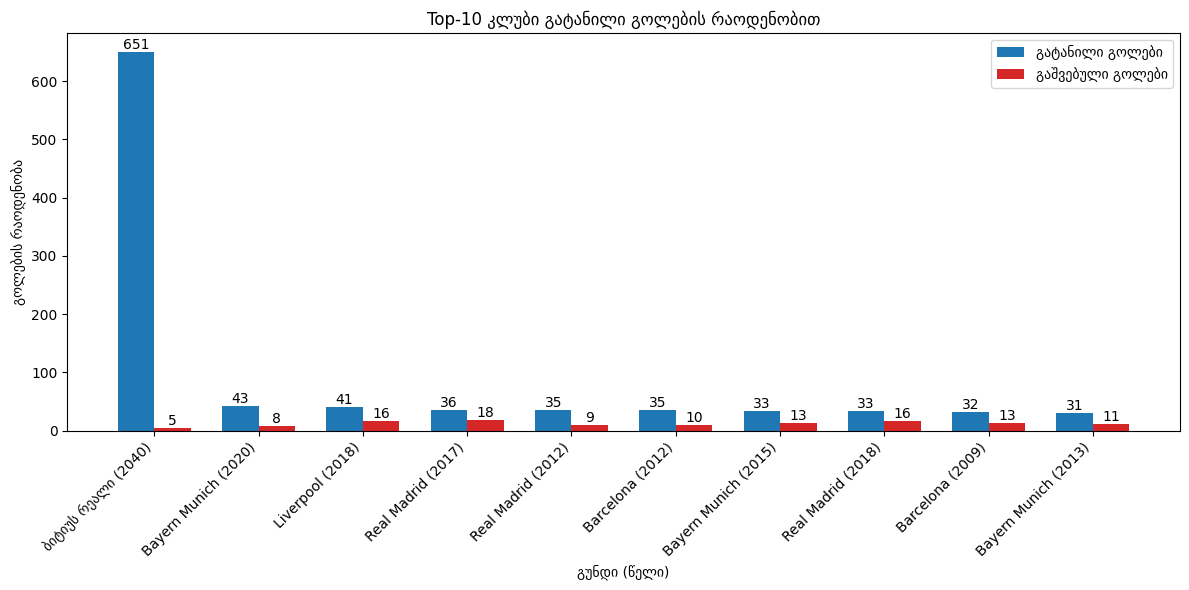

In [12]:
 # გამოაქვს გატანილი გოლებით top-10 გუნდი



cursor.execute("""
    SELECT team, year, goals_scored, goals_conceded 
    FROM ucl_stats 
    ORDER BY goals_scored DESC 
    LIMIT 10
""")
top_teams = cursor.fetchall()


teams_with_years = [f"{x[0]} ({x[1]})" for x in top_teams]
scored = [x[2] for x in top_teams]
conceded = [x[3] for x in top_teams]


plt.figure(figsize=(12,6))
width = 0.35  
x_pos = range(len(teams_with_years))


scored_bars = plt.bar(x_pos, scored, width, color='#1f77b4', label='გატანილი გოლები')
conceded_bars = plt.bar([x + width for x in x_pos], conceded, width, color='#d62728', label='გაშვებული გოლები')


plt.title('Top-10 კლუბი გატანილი გოლების რაოდენობით')
plt.xlabel('გუნდი (წელი)')
plt.ylabel('გოლების რაოდენობა')
plt.xticks([x + width/2 for x in x_pos], teams_with_years, rotation=45, ha='right')
plt.legend()


for bar in scored_bars + conceded_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

### დიაგრამა 2: კონკრეტული გუნდის გატანილი და გაშვებული გოლები კონკრეტულ წელს


 კონკრეტული გუნდის გატანილი და გაშვებული გოლები კონკრეტულ წელს


კლუბი:  ბიტიუს რეალი
წელი:  2040


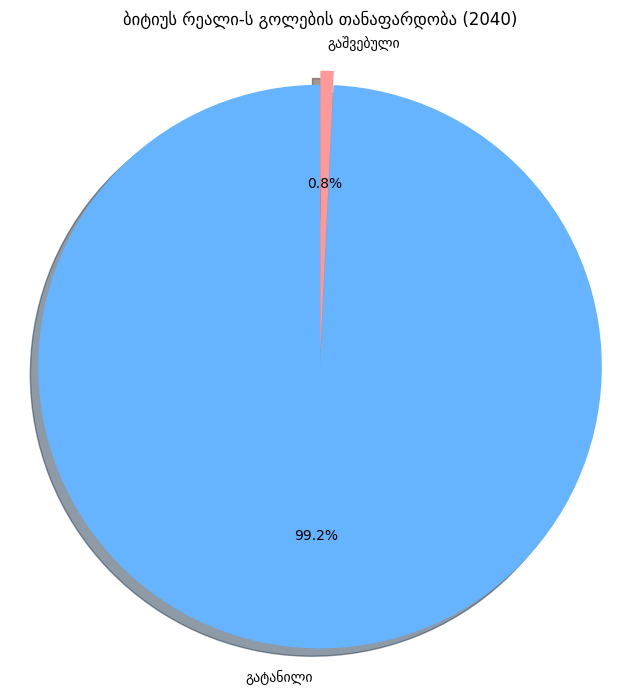

In [7]:
#შეგვყავს წელი და სახელი და გამოაქვს კონკრეტული გუნდის გატანილი და გაშვებული გოლები კონკრეტულ წელს pie დიაგრამაზე

team_pie = input("კლუბი: ")
year_pie = int(input("წელი: "))

cursor.execute("""
    SELECT goals_scored, goals_conceded 
    FROM ucl_stats 
    WHERE team=? AND year=?
""", (team_pie, year_pie))

goals_data = cursor.fetchone()

if goals_data:
    labels = ['გატანილი', 'გაშვებული']
    sizes = [goals_data[0], goals_data[1]]
    colors = ['#66b3ff', '#ff9999']
    explode = (0.05, 0) 
    
    plt.figure(figsize=(8,8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(f'{team_pie}-ს გოლების თანაფარდობა ({year_pie})', pad=20)
    plt.axis('equal')
    plt.show()
else:
    print("ამ კლუბის მონაცემები არ მოიძებნა!(შეამოწმე სახელი და წელი სწორად გაქვს მითითებული თუ არა)")

### დიაგრამა 3: G/D გოლების თანაფარდობა

კლუბი:  Barcelona


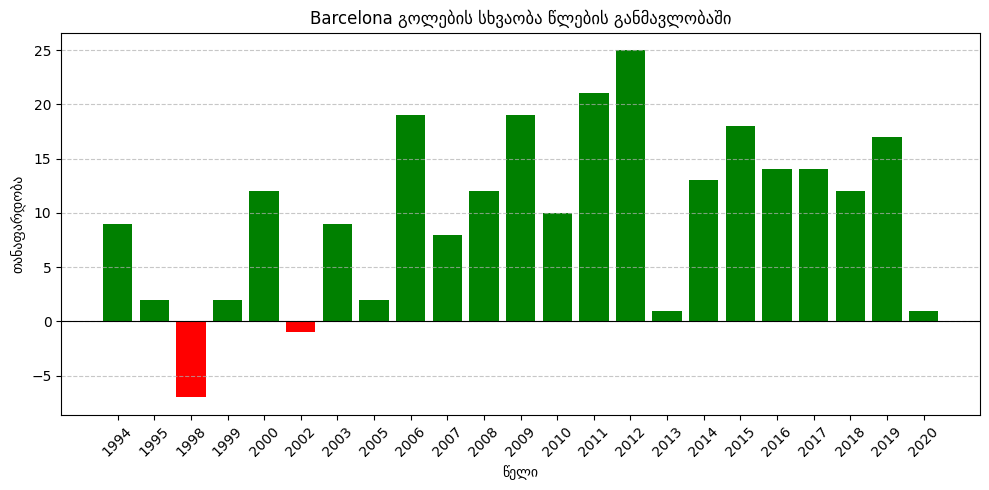

In [8]:
# გამოაქვს კონკრეტული კლუბის გოლების სხვაობა წლების განმავლობაში

team_gd = input("კლუბი: ")

cursor.execute("""
    SELECT year, gd 
    FROM ucl_stats 
    WHERE team=? 
    ORDER BY year
""", (team_gd,))

gd_data = cursor.fetchall()

if gd_data:
    years = [str(x[0]) for x in gd_data]
    gd_values = [x[1] for x in gd_data]
    
    plt.figure(figsize=(10,5))
    
    
    colors = ['green' if x >= 0 else 'red' for x in gd_values]
    
    plt.bar(years, gd_values, color=colors)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(f'{team_gd} გოლების სხვაობა წლების განმავლობაში')
    plt.xlabel('წელი')
    plt.ylabel('თანაფარდობა')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("ამ კლუბის მონაცემები არ მოიძებნა!")



<span style="font-size:30px; color:red; font-weight:bold;">ბაზასთან კავშირის შეწყვეტა</span>


In [10]:
conn.close()
print("\n კავშირი შეწყდა!")  



 კავშირი შეწყდა!


# THE END
